In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
df = pd.read_csv('spam.csv',encoding = 'latin-1',header = 0,names = ['label','text','1','2','3'])
df.head()

,label,text,1,2,3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['1','2','3'],axis = 1,inplace=True)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
text     5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [6]:
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [7]:
df['length'] = df.text.apply(len)

In [8]:
df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


label
ham     Axes(0.125,0.125;0.775x0.755)
spam    Axes(0.125,0.125;0.775x0.755)
dtype: object

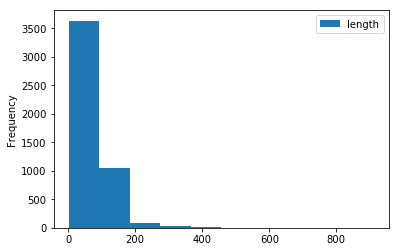

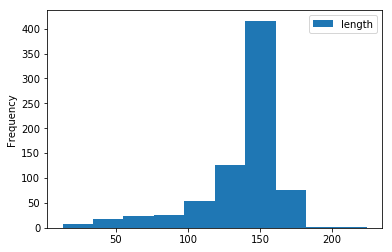

In [9]:
df.groupby('label').plot(kind = 'hist',by='label')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002D0B445FF60>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002D0B452F668>], dtype=object)

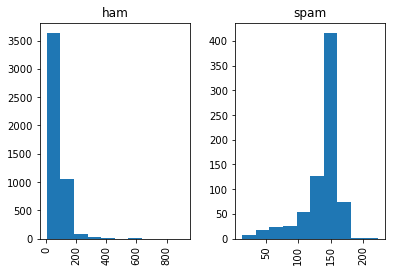

In [10]:
df.hist(column = 'length',by = 'label')

In [11]:
num_folds = 10
seed = 9
scoring = 'accuracy'
validation_size=0.2

In [12]:
X_train, X_validation, Y_train, Y_validation = train_test_split(df['text'], df['label'], test_size=validation_size, random_state=seed)

## Convert a collection of raw documents to a matrix of TF-IDF features.

In [13]:
vectorize = TfidfVectorizer()
vectorize.fit(X_train)
features=vectorize.transform(X_train)
features_validation = vectorize.transform(X_validation)

# Before hyperparameter tuning

## Dense data and sparse data problem

GaussianNB and LinearDiscriminant require dense data

In [14]:
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('NB',MultinomialNB()))
models.append(('AB', AdaBoostClassifier()))
models.append(('BAG', BaggingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, features, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append((name,[cv_results.mean()]))
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.960739 (0.013864)
KNN: 0.902628 (0.012147)
CART: 0.967247 (0.008023)
SVM: 0.859102 (0.015590)
NB: 0.958267 (0.012375)
AB: 0.973299 (0.009704)
BAG: 0.971285 (0.007939)
RF: 0.969490 (0.011351)
ET: 0.974649 (0.011168)


In [15]:
pred_before = pd.DataFrame.from_items(names,orient='index',columns=['before_training_socre'])
pred_before

,before_training_socre
LR,0.960739
KNN,0.902628
CART,0.967247
SVM,0.859102
NB,0.958267
AB,0.973299
BAG,0.971285
RF,0.969490
ET,0.974649


# Hyperparameter tuning - takes forever to run. Skip to the next section.

In [ ]:
# Logistic regression
model = LogisticRegression(random_state=seed)
penalty = {'penalty ':('l1','l2')}
kfold = KFold(n_splits=num_folds, random_state=seed)
solver = {'solver':('newton-cg','lbfgs','liblinear','sag')}
c = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
parameters = {'solver':('newton-cg','lbfgs','liblinear','sag'),'C': [0.1,100,1000,3000],'max_iter':[4000]}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(features,Y_train)
results =pd.DataFrame(clf.cv_results_)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
model = LogisticRegression(C= 3000, max_iter= 4000, solver= 'sag')
model.fit(features,Y_train)

In [ ]:
pred = model.predict(features_validation)

In [ ]:
accuracy_score(Y_validation,pred)

In [ ]:
# KNeighborsClassifier, use random search, grid search too slow
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
n = list(range(1,70))
neighbour = {'n_neighbors':n}
parameters = {'n_neighbors':n}
clf = RandomizedSearchCV(estimator=model, param_distributions=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(features,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
model = KNeighborsClassifier(n_neighbors=23)
model.fit(features,Y_train)
pred = model.predict(features_validation)
accuracy_score(Y_validation,pred)

In [ ]:
#DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n = list(range(2,20))
min_num_split = {'min_samples_split':n}
parameters = {'min_samples_split':n}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(features,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
model = DecisionTreeClassifier(min_samples_split=4)
model.fit(features,Y_train)
pred = model.predict(features_validation)
accuracy_score(Y_validation,pred)

In [ ]:
#SVC use random search, grid search too slow
model = SVC(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
kernel  = {'kernel':['poly','rbf','sigmoid']}
gamma = {'gamma':np.logspace(-5, 5, 20).tolist()}
#c = {'C':[0.01,1,10,100]}
parameters = {'kernel':['poly','rbf','sigmoid'],'gamma':np.logspace(-3, 3, 10).tolist()}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(features,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
np.logspace(-3, 3, 10)

In [ ]:
np.linspace(0.05, 1, num=20)

In [ ]:
#MultinomialNB
model = MultinomialNB()
kfold = KFold(n_splits=num_folds, random_state=seed)
alpha = {'alpha':np.logspace(-5, 5, 20).tolist()}
parameters = {'alpha':np.logspace(-5, 5, 20).tolist()}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(features,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
#AdaBoostClassifier
model = AdaBoostClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n_estimators = {'n_estimators':list(range(35,80))}
parameters = {'n_estimators':list(range(35,80))}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(features,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
#BaggingClassifier
model = BaggingClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n_estimators = {'n_estimators':list(range(2,20))}
parameters = {'n_estimators':list(range(2,20))}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(features,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
#RandomForestClassifier
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n_estimators = {'n_estimators':list(range(2,20))}
parameters = {'n_estimators':list(range(2,20))}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(features,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
#ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n_estimators = {'n_estimators':list(range(2,20))}
parameters = {'n_estimators':list(range(2,20))}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(features,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Hyperparameter tuning ends here

## After hyperparameter tuning - best performers

In [16]:
models = []
models.append(('LR', LogisticRegression(C= 3000, max_iter= 4000, solver='sag',random_state=seed)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=23)))
models.append(('CART', DecisionTreeClassifier(min_samples_split=8,random_state=seed)))
models.append(('SVM', SVC(gamma= 0.46415888336127775, kernel= 'rbf',random_state=seed)))
models.append(('NB',MultinomialNB(alpha= 0.01438449888287663)))
models.append(('AB', AdaBoostClassifier(n_estimators=78,random_state=seed)))
models.append(('BAG', BaggingClassifier(n_estimators=13,random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=7,random_state=seed)))
models.append(('ET', ExtraTreesClassifier(n_estimators=9,random_state=seed)))
results = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, features, Y_train, cv=kfold, scoring=scoring)
    model.fit(features, Y_train)
    pred = model.predict(features_validation)
    accuracy = accuracy_score(Y_validation,pred)
    results.append((name,[cv_results.mean(),accuracy]))
    msg = "%s: %f (%f) %f" % (name, cv_results.mean(), cv_results.std(), accuracy)
    print(msg)

LR: 0.982277 (0.008355) 0.987444
KNN: 0.955802 (0.009403) 0.966816
CART: 0.969715 (0.008979) 0.964126
SVM: 0.978238 (0.010131) 0.986547
NB: 0.982723 (0.004819) 0.990135
AB: 0.977115 (0.007885) 0.977578
BAG: 0.974426 (0.008396) 0.974888
RF: 0.971730 (0.008754) 0.981166
ET: 0.978686 (0.009092) 0.978475


In [17]:
pred_after = pd.DataFrame.from_items(results,orient='index',columns=['after_training_socre','validation_score'])
pred_after

,after_training_socre,validation_score
LR,0.982277,0.987444
KNN,0.955802,0.966816
CART,0.969715,0.964126
SVM,0.978238,0.986547
NB,0.982723,0.990135
AB,0.977115,0.977578
BAG,0.974426,0.974888
RF,0.971730,0.981166
ET,0.978686,0.978475


In [18]:
df = pd.concat([pred_before,pred_after],axis=1)
df

,before_training_socre,after_training_socre,validation_score
LR,0.960739,0.982277,0.987444
KNN,0.902628,0.955802,0.966816
CART,0.967247,0.969715,0.964126
SVM,0.859102,0.978238,0.986547
NB,0.958267,0.982723,0.990135
AB,0.973299,0.977115,0.977578
BAG,0.971285,0.974426,0.974888
RF,0.969490,0.971730,0.981166
ET,0.974649,0.978686,0.978475


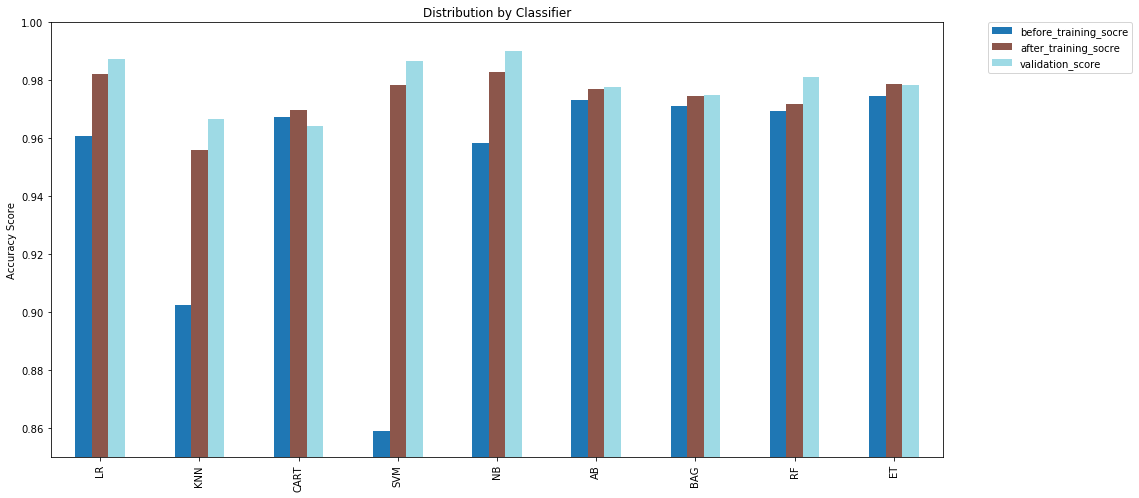

In [19]:
df.plot(kind='bar',ylim=(0.85,1.0), figsize=(16,8), align='center',colormap="tab20")
plt.xticks(np.arange(9),df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [21]:
df.sort_values(['validation_score'],ascending=0 )

,before_training_socre,after_training_socre,validation_score
NB,0.958267,0.982723,0.990135
LR,0.960739,0.982277,0.987444
SVM,0.859102,0.978238,0.986547
RF,0.969490,0.971730,0.981166
ET,0.974649,0.978686,0.978475
AB,0.973299,0.977115,0.977578
BAG,0.971285,0.974426,0.974888
KNN,0.902628,0.955802,0.966816
CART,0.967247,0.969715,0.964126


# NB MultinomialNB(alpha= 0.01438449888287663) is the winner